## Review from the previous lecture
In yesterday's Lecture 2, you learned how to use the `numpy` module, how to make your own functions, and how to import and export data. Below is a quick review before we move on to Lecture 3.

Remember, to use the `numpy` module, first it must be imported:

In [1]:
import numpy as np

You can do a lot with the `numpy` module. Below is an example to jog your memory:

In [2]:
np.linspace(0,10,11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

Do you remember loops? Let's use a `while` loop to make an array of 10 numbers. Let's have each element be increased by 2 compared with the previous element. Let's also have the first element of the array be 1.

In [3]:
# your code here

#start by defining the length of the array
arrayLength = 10

#let's set the array to currently be an array of 0s
myArray = np.zeros(arrayLength) #make a numpy array of 10 zeros

# Let's define the first element of the array
myArray[0] = 1

i = 1 #with the first element defined, we can calculate the rest of the sequence beginning with the 2nd element
while i < arrayLength:
    myArray[i] = myArray[i-1]+2
    i = i + 1
    
print(myArray)

[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19.]


There's your quick review of `numpy` and a while loop. Now we can move on to the content of Lecture 3.

## A. Data Introspection
One of the most common tasks in experimental physics is trying to model experimental data with a function. This lecture will walk through how to accomplish this with python. First, let's import some data.

In [4]:
# This data was generated using the methods described in the preview notebook. Feel free to read through the preview to see how it was done.
data_filename = "https://raw.githubusercontent.com/astroumd/GradMap/master/notebooks/Lectures2021/Lecture3/Data/photopeak.txt"
x_data, y_data = np.loadtxt(data_filename, usecols=(0, 1), unpack=True)
print(x_data, y_data)

[0.549626 0.946    0.8987   0.8514   0.8041   0.7568   0.7095   0.6622
 0.6149   0.5676   0.5203   0.68112  0.64328  0.73788  0.58652 ] [ 272.   32.   50.   50.  150.  733. 3126. 5413. 2125.  368.  391. 5009.
 4478. 1516.  539.]


Let's plot it to see what it looks like!

In python there are multiple plotting libraries, but the moset common one is `matplotlib`, and that is the one we will be using today.

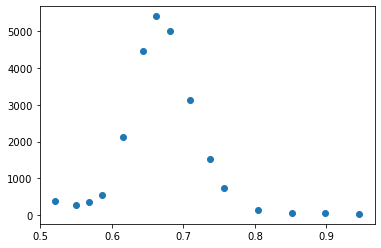

In [5]:
# Import the matplotlib package. Really, we only need the pyplot sub-package, so we import it this way. Renaming it to 'plt' is common practice.
import matplotlib.pyplot as plt

# The most basic kind of scatter plot you can plot using matplotlib is done like this:
plt.scatter(x_data, y_data)

# At the end of a cell where you are plotting things, this line tells python that you want do display the plots you defined in the cell.
plt.show()

Usually, you will want to have some theory-based motivation for the function you choose to model some set of data, but for this example, we don't know anything about the data other than the points themselves. In this type of situation, trying to fit a simple function to the data is not a bad first step in trying to understand it. What function do you think might fit this data based on how it looks in the plot?

<details>
<summary>Answer</summary>
It looks like the data is shaped like a normal (gaussian) distribution, so let's try to fit it to that! First, let's define a gaussian function for fitting.
    
The equation for a Gaussian curve is the following:

$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$

where $\mu$ is the mean and $\sigma$ is the standard deviation. We also want to be able to scale our function to fit the scale of the data, so we should multiply the equation by some amplitude, A.
</details>

In [6]:
# While not necessary in python, defining datatypes using what are called 'type hints' has become the norm for modern python.
# It has a lot of benefits, and if you have time in the future, you should consider learning to use them.
from typing import Union

# The docstring in this function is formatted in 'google style'. 'Numpy style' is another popular way to write docstrings.
# Choosing one of these styles and using them for all of your docstrings will make your code much easier to read and maintain.
def gauss(x: Union[float, np.array], mean: float, std: float, amp: float) -> Union[float, np.array]:
    """A general implementation of a gaussian function.

    f(x) = A * e^(-1/2 * ((x-mu)/sigma)^2)
    To normalize this function, you would multiply by sigma * sqrt(2*pi)/A.

    Args:
        x: the input for f(x).
        mean: the center of the gaussian function (mu).
        std: the standard deviation of the gaussian functino (sigma).
        amp: the scaling amplitude of the gaussian function (A).

    Returns:
        The amplitude of the gaussian function for a given x.
    """
    return amp * np.exp(-1 / 2 * ((x - mean) / std)**2)


# This is what is in the student version:

# # Change the body of this function so that is returns the value at x of the gaussian defined by the parameters.
# def gauss(x, mean, std, amp):
#     """Write what the function does here!"""
#     raise NotImplementedError

What values of these parameters do you think will match the data above?

In [7]:
mu = 0.67
sigma = 0.04
amp = 5500


# This is what is in the student version:

# mu = 
# sigma = 
# amp = 

Let's try plotting the function the function with these parameters next to the data! For this, we should define some evenly-spaced x-values to calculate the function at using `np.linspace`:

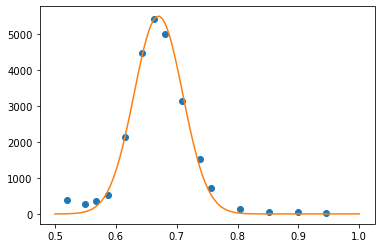

In [8]:
x_points = np.linspace(0.5, 1, 100)

plt.plot(x_data, y_data, linestyle='', marker='.', markersize=12) # This line makes the same plot as plt.scatter, but avoids some quirks in matplotlib.
# Try replacing this with plt.scatter(x_data, y_data) and see what happens!
# plt.scatter(x_data, y_data)

y_gauss = gauss(x_points, mu, sigma, amp)
plt.plot(x_points, y_gauss)
plt.show()


# This is what is in the student version:

# x_points = # Use np.linspace here.

# plt.plot(x_data, y_data, linestyle='', marker='.', markersize=12) # This line makes the same plot as plt.scatter, but avoids some quirks in matplotlib.
# # Try replacing this with plt.scatter(x_data, y_data) and see what happens!
# # plt.scatter(x_data, y_data)

# y_gauss = # Finish this line to get the y-values using the function you made above.
# plt.plot(x_points, y_gauss)
# plt.show()

`plt.plot` is the standard do-it-all plotting function in `matplotlib`. Everything about how the series looks can be modified.

## B. Goodness-of-fit

How good was your guess? How do you even answer that question?

<details>
<summary>Answer</summary>
Let's use something called the $L_2$ norm: $||y - f(x)||^2$ to get a metric of the difference between our data and our function. This may sound and look fancy, but all it's doing is calculating the distance at each x-value in the data between the data y-value and the function y-value. Then, it squares those distances and adds them all together.

This is defined by `np.sum((y_data - y_data_gauss)**2)` for our setup.
</details>

In [9]:
y_data_gauss = gauss(x_data, mu, sigma, amp)
l2_norm = np.sum((y_data - y_data_gauss)**2)
print(l2_norm)


# This is what is in the student version:

# y_data_gauss = # Finish this line to get y_gauss at the x_data.
# l2_norm = # Finish this line to calculate the L_2 norm.
# print(l2_norm)

489105.9304533288


Try changing the parameters to something bad and see what happens to the value of `l2_norm`. Since this definition of the $L_2$ norm is not normalized by something like a standard deviation of the data, it can't tell us in absolute terms how good our funciton fits, but it can at least tell us if one set of parameters fits better than another. This is really helpful!

In [10]:
mu = 0.3
sigma = 0.1
amp = 500

l2_norm = np.sum((y_data - gauss(x_data, mu, sigma, amp))**2)
print(l2_norm)


# This is what is in the student version:

# mu = 
# sigma = 
# amp = 

# l2_norm = np.sum((y_data - gauss(x_data, mu, sigma, amp))**2)
# print(l2_norm)

92145169.9069555


But, how do we know when we have a best fit? How would you try to figure it out?

Thankfully, we don't have to create our own method to do this. The smart people working on the `scipy` package have already built an optimized tool for us to use! It's called the `curve_fit` function as is part of the `scipy.optimize` sub-package.

## C. Fitting

In [11]:
import scipy.optimize

`scipy.optimize.curve_fit` is a type of minimization function. In this case, the function finds the parameters of another given function that minimize the $L_2$ norm between the data points and what our gauss function thinks the data points should be at a given x.

A quick, useful way to see what a function does without having to google it is to use the built-in python `help` function.

In [12]:
help(scipy.optimize.curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``.
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...). It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : array_like or object
        The independent variable where the data is measured.
        Should usually be an M-length sequence or an (k,M)-shaped array for
        functions with k predictors, but can actually be any object.
    ydata : array_like
        The dependent data, a length M array - nominally ``f(xdata, ...)``.
    p0 : array_like, optional
        Initial guess for the parameters (length N). If None, then the
        initi

That gave us a lot of information about the `curve_fit` function! As you can see, `curve_fit` takes a function as its first parameter, and it tells us exactly how to arrange the parameters of that function (thankfully, our `gauss` function should already have this form). The next two parameters `curve_fit` takes are `xdata` and `ydata` (`x_data` and `y_data` as we defined them). The rest are optional and will be talked about briefly at the end of this lecture.

Let's try calling help on the `gauss` function we defined above.

In [13]:
help(gauss)


# This is what is in the student version:

# 

Help on function gauss in module __main__:

gauss(x: Union[float, <built-in function array>], mean: float, std: float, amp: float) -> Union[float, <built-in function array>]
    A general implementation of a gaussian function.
    
    f(x) = A * e^(-1/2 * ((x-mu)/sigma)^2)
    To normalize this function, you would multiply by sigma * sqrt(2*pi)/A.
    
    Args:
        x: the input for f(x).
        mean: the center of the gaussian function (mu).
        std: the standard deviation of the gaussian functino (sigma).
        amp: the scaling amplitude of the gaussian function (A).
    
    Returns:
        The amplitude of the gaussian function for a given x.



What do you think the `help` function does?

<details>
<summary>Answer</summary>
You can see help just returns the function "signature" and the string at the start of the function (called the "docstring").
</details>

Now, let's use `curve_fit` to fit the data to our function!

In [14]:
# The variable names popt and pcov come from the curve_fit function. We will get into what they mean soon!
popt, pcov = scipy.optimize.curve_fit(gauss, x_data, y_data)

print(popt)
print(pcov)

[6.69130766e-01 4.13010233e-02 5.33663054e+03]
[[ 1.49349449e-06 -5.34505344e-08  8.46692964e-03]
 [-5.34505344e-08  1.32738640e-06 -7.24032279e-02]
 [ 8.46692964e-03 -7.24032279e-02  1.44313779e+04]]


Do you know what `popt` is? How would you find out?

<details>
<summary>Answer</summary>

If you look back at the `help` output from `curve_fit`, `popt` is a list of the best-fit parameters of our gauss function for this data. The parameters in the list are in the order that the parameters are listed in our `gauss` function (`mean`, `std`, `amp`). Let's try plotting the data, our guess, and the best fit from `curve_fit`!
</details>

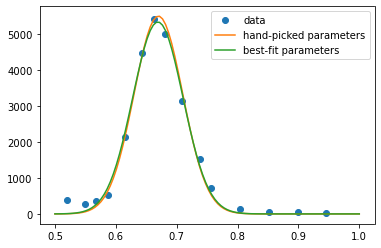

In [15]:
mu = 0.67
sigma = 0.04
amp = 5500
x_points = np.linspace(0.5, 1, 100)
plt.plot(x_data, y_data, linestyle='', marker='.', markersize=12, label='data')  # The parameter "label" gives a name to the data series.
plt.plot(x_points, gauss(x_points, mu, sigma, amp), label='hand-picked parameters')
plt.plot(x_points, gauss(x_points, *popt), label='best-fit parameters')  # using "*popt" is a nice python trick that expands popt into the three individual values it contains.
plt.legend()  # This function produces a legend of the plots and their names.
plt.show()


# # This is what is in the student version:
# x_points = 
# plt.plot(x_data, y_data, linestyle='', marker='.', markersize=12, label='data')  # The parameter "label" gives a name to the data series.

# # Try adding labels to these plots!
# plt.plot() # Finish this line to plot your hand-picked best-guess parameters from earlier.
# plt.plot()  # Finish this line to plot the best fit parameters from curve_fit.

# # This function produces a legend of the plots and their labels. You can leave this line as is.
# plt.legend()
# plt.show()

How close was your guess to the best fit?

## D. Interpreting Fitting Errors
`pcov` is a little more complicated. `pcov` is what's called the "covariance matrix" of the best fit parameters. As shown in the `help` output, the standard deviations of the parameters can be recovered from this matrix in the following way: `perr = np.sqrt(np.diag(pcov))`

Since we aren't teaching linear algebra here, all of the matrix manipulations will be given to you. All that needs to be taken away from this is how to read this specific matrix.

In [16]:
perr = np.sqrt(np.diag(pcov)) # This comes straight from the curve_fit help output.

# This is an example of string formatting in python.
# Each set of {} corresponds to a parameter passed to .format().
# .3e means "format this number in scientific notation with 3 digits after the decimal".
# using "*perr" is a nice python trick that expands perr into the three individual values it contains.
# All of this is out of the scope of this lecture, but it's good to get exposure to these things.
# Just look at how nice the out put looks!
print('s_mu = {:.3e}, s_sigma = {:.3e}, s_amp = {:.3e}'.format(*perr))

s_mu = 1.222e-03, s_sigma = 1.152e-03, s_amp = 1.201e+02


The covariance matrix looks like this for the parameters in our `gauss` function

\begin{bmatrix}
s_{\mu}^2 & cov(\mu, \sigma) & cov(\mu, A)\\
cov(\sigma, \mu) & s_{\sigma}^2 & cov(\sigma, A)\\
cov(A, \mu) & cov(A, \sigma) & s_A^2
\end{bmatrix}

Where $s_x^2$ is the variance of a parameter $x$ and $s_x$ is its estimated standard deviation, and $cov(x, y)$ is the covariance between parameters $x$ and $y$.

Can you guess what `np.sqrt(np.diag(pcov)` does now?

Covariance can be difficult to visualize. It's often much easier to look at something called the "correlation coefficient" instead. The correlation coefficients can be easily found from the covariance matrix by using this transformation:

$cor(x, y) = \frac{cov(x, y)}{s_x s_y}$

Performing this transformation on the covariance matrix gives the correlation matrix, which looks like this:

\begin{bmatrix}
1 & cor(\mu, \sigma) & cor(\mu, A)\\
cor(\sigma, \mu) & 1 & cor(\sigma, A)\\
cor(A, \mu) & cor(A, \sigma) & 1
\end{bmatrix}

The code for this is a bit beyond the scope of this lecture, so it has been done for you below.

In [17]:
perr_transpose = np.atleast_2d(perr).T
pcor = pcov / perr / perr_transpose
print(pcor)

[[ 1.         -0.03796222  0.05767269]
 [-0.03796222  1.         -0.52312484]
 [ 0.05767269 -0.52312484  1.        ]]


The correlation coefficients say how related the parameters are (-1 = perfectly anti-correlated, 0 = perfectly independent, 1 = perfectly correlated). As you can see here, the mean is independent from both of the other parameters, but the standard deviation and the amplitude are fairly anti-correlated. Any guesses on why this would be?

<details>
<summary>Answer</summary>

As you increase the amplitude, the plot stretches up, moving the curve away from many points in the bell curve. This can be compensated for by reducing the standard deviation, bringing the sides of the bell curve in toward the points. The converse is also true.
</details>

The type of minimization that `curve_fit` does is called a least-squares fit. To do this least-squares fit, the function uses a numerical method called "lm" by default. It's generally a good idea to try to fit using the defaults. Sometimes, this won't work, and you will need to take more steps. The procedure is generally as follows:

1. Add bounds and initial guesses to the parameters so that the minimizer knows where to look for the best-fit.
1. Add a Jacobian matrix to tell the minimizer how quickly to change the parameters relative to each other.
1. Try different metrics to determine goodness-of-fit and/or different minimizers.
1. Switch to some form of deterministic machine learning algorithm.
1. Switch to a non-deterministic machine learning algorithm.

These steps get progressively more complicated and time consuming. Between every step you should be asking yourself whether or not there isn't some better way to formulate your problem.